In [1]:
#unsupervised learnin - no target , unlabelled data 
#clustering - grouping 
#dimensionality reduction - reducing while preserving imp nfo 
#k means clustering - no. of (data points) clusters ,  clustered together 
#heirarchical clustering - top down / bottom up clustering 
#|| - norm (distance)
#euclidean - straight forward , diagonal 
#Manhattan distance - moves all the ways , no diagonal 
#app of USL- climate pattern , energy consumption, biodiversity classification 

In [2]:
#dendrogram -->  a tree-like diagram used to show hierarchical relationships between items.

In [10]:
#Supervised learning  
#importing necc lib 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression #classification 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #

In [4]:
# Load the ds 
df = pd.read_csv('green_tech_data.csv')
df.head() # only feats and no target -  a classification

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [5]:
 #classification- because 0 and 1 in the last cols which are divided based on classes . 

In [6]:
#missing values 
df.isna().sum() # - 0 hence no missing values 

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64

In [7]:
df.columns

Index(['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency', 'sustainability'],
      dtype='object')

In [9]:
# feats and target selection - X - feat and Y - target 
X = df[['carbon_emissions', 'energy_output', 'renewability_index',
       'cost_efficiency']] #multidimensional 
Y = df['sustainability']

In [13]:
#split the ds 
X_train, X_test, Y_train, Y_test = train_test_split( 
X, Y, test_size = 0.2, random_state = 42) #20% data for testing
#Fixes randomness for repeatable results
#Ensures the same split every time you run the code

In [14]:
X_train.shape

(80, 4)

In [15]:
X_train.shape[0]

80

In [16]:
X_train.shape[1]

4

In [17]:
Y_train.shape[0]

80

In [18]:
#model instantiation - Logistic regression, classification algo 
model = LogisticRegression()


In [19]:
# train the model 
model.fit(X_train, Y_train)

LogisticRegression()

In [21]:
#prediction 
Y_pred = model.predict(X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [23]:
#Evaluation - metrics - accuracy score, confusion metrics and classification report 
acc = accuracy_score(Y_test, Y_pred)
print(f'The accuracy score is :{acc*100:.2f}%')


The accuracy score is :95.00%


In [24]:
#confusion matrix - false, true , positives and negatives , actually positive(1),actually megative(0), Predicted negative(0), Predicted positive(1), 
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[17,  0],
       [ 1,  2]], dtype=int64)

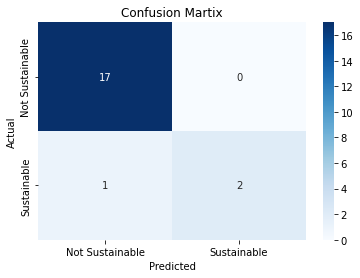

In [27]:
#using seaborn 
sns.heatmap(cm, annot = True, fmt ='d', cmap= 'Blues',
            xticklabels=['Not Sustainable', 'Sustainable'],
            yticklabels=['Not Sustainable', 'Sustainable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Martix')
plt.show()
#Train CM: perfect
#Test CM: perfect
#Suspicious unless dataset is trivial
#The confusion matrix can’t be the same because train and test data are different, so the model makes different predictions.
#This difference tells you the model generalizes(how well the model performs) .

In [29]:
#classification report 
cr = classification_report(Y_test, Y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.67      0.80         3

    accuracy                           0.95        20
   macro avg       0.97      0.83      0.89        20
weighted avg       0.95      0.95      0.95        20



In [ ]:
#unbiased ds, increasing complexity  - gives generalized ds

In [30]:
# precision  - 94% of precision for 17 cases , formula - TP/TP+FP
#recall - if 100% then model is accurate , shows false negatives - used for diagonizing, formula = TP/TP+FN
#f1-score - 

In [31]:
#which feat is most influencing - feat importance 
coef = pd.DataFrame(model.coef_.T, index=X.columns, columns = ['Coefficient'])
print(coef) #renewability_index=1.092183 is the most infuencing/imp feat  
#cost_efficiency=-1.259561 - A BIG No 

                    Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092183
cost_efficiency       -1.259561


In [32]:
#save the model 
import joblib 
joblib.dump(model, 'LR_Classification.pkl')

['LR_Classification.pkl']

# Random forest Algo 

In [55]:
from sklearn.ensemble import RandomForestClassifier #lib used for classification model 

In [56]:
# new ds - classification model 
data = pd.read_csv('agricultural sustainability.csv')
data.tail() #last values

,soil_health,crop_yield,water_usage,carbon_footprint,fertilizer_use,sustainability
195,0.349210,9376.815930,2632.827381,442.455759,72.895518,0
196,0.725956,8725.714767,3504.009823,469.453227,279.328394,0
197,0.897110,4860.946246,1275.439420,304.309933,84.204658,0
198,0.887086,7757.839610,1365.300585,363.492871,287.559338,0
199,0.779876,7790.885867,683.908773,465.124722,161.501443,0


In [57]:
data.shape


(200, 6)

In [58]:
# missing values 
data.isna().sum()

soil_health         0
crop_yield          0
water_usage         0
carbon_footprint    0
fertilizer_use      0
sustainability      0
dtype: int64

In [59]:
data.columns

Index(['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use', 'sustainability'],
      dtype='object')

In [60]:
#feats adnd target selection 
x = data[['soil_health', 'crop_yield', 'water_usage', 'carbon_footprint',
       'fertilizer_use']]
y = data['sustainability'] 

In [61]:
# spliting the ds 
xtr, xte, ytr, yte = train_test_split(
x, y, train_size = 0.8, random_state=12) # now 80% rows are for training and rest 20% for testing 
# splitting is row wise 

In [62]:
xtr.shape

(160, 5)

In [63]:
# Instantiate the model 
rf_model = RandomForestClassifier(
n_estimators = 100, random_state= 42) #n_estimators = 100 --> number of decision trees in the forest

In [64]:
# train model 
rf_model.fit(xtr, ytr)

RandomForestClassifier(random_state=42)

In [67]:
rf_model.predict(xte)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [66]:
#why random forest - no overfitting issues 

In [68]:
#predict 
rf_pred = rf_model.predict(xte)
rf_pred # if sustainable = 1, if not = 0

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [74]:
rf_acc = accuracy_score(yte, rf_pred)
print(rf_acc) #100% accuracy 

1.0


In [75]:
#confusion matrix 
cm = confusion_matrix(yte, rf_pred)
cm 

array([[35,  0],
       [ 0,  5]], dtype=int64)

In [76]:
#classification report 
cr_rf = classification_report(yte, rf_pred)
print(cr_rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



# K-means  - unsupervised learning 


In [27]:
#k -means necc lib 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler #scaling the data - making them proportional to each other - aka standardization 
from sklearn.metrics import silhouette_score

In [28]:
#scaling 
scaler = StandardScaler() #instantiate the scaler 

In [29]:
data_scaled = scaler.fit_transform(df1)
print(pd.DataFrame(data_scaled, columns = df1.columns).head())

   temperature  humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    -0.415900 -0.452465    0.801884          0.482494         -0.684316   
1     1.587377 -0.593258   -1.100359         -0.136414         -1.389866   
2     0.826917 -1.135149   -0.534981          1.611824         -1.280827   
3     0.363328  0.355146    0.569224         -0.968007         -1.093072   
4    -1.175669 -0.096466   -0.062635          0.308475         -1.013623   

   pollution_level   cluster  
0         1.193409  1.002201  
1        -0.029923  0.508919  
2        -1.067119  0.508919  
3         0.809835 -1.464209  
4        -0.292954  0.508919  


In [30]:
#extra
#load the ds 
df1 = pd.read_csv('environmental factors.csv')
df1.head() #no target/label, hence supervised 

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814


In [31]:
#elbow methdd 
inertia = []
k_range = range(1,11) #1 to 10'
for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

In [32]:
inertia

[70000.00000000006,
 57911.187497723535,
 52049.761479458204,
 47292.86690360769,
 43261.869018765305,
 39832.099327547,
 36660.463092807986,
 35583.795488913885,
 34522.631206612255,
 33589.465185763045]

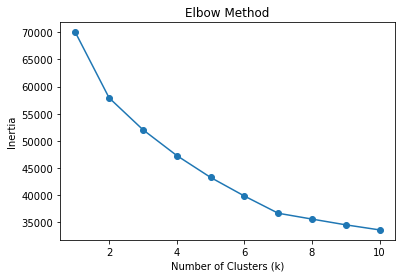

In [33]:
#plot the inertia to know the elbow method 
plt.plot(k_range, inertia, marker ='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [34]:
#where it makes a sharp curve choose that cluster 

In [35]:
k = 7
kmeans = KMeans(n_clusters = k, random_state = 42)
df1['cluster'] = kmeans.fit_predict(data_scaled)
print(df1)

      temperature   humidity  wind_speed  carbon_emissions  solar_irradiance  \
0       22.490802  52.418449   19.599966        337.165056        369.020837   
1       34.014286  49.974726    8.690240        256.681604        185.335998   
2       29.639879  40.569235   11.932794        484.024336        213.723302   
3       26.973170  66.436000   18.265613        148.540303        262.604015   
4       18.120373  58.597450   14.641787        314.535387        283.288001   
...           ...        ...         ...               ...               ...   
9995    32.153120  82.622318   24.045509        389.315259        660.200681   
9996    32.950177  32.808837   19.956484        394.037121        303.574216   
9997    33.934158  48.221908    5.389117        171.306244        774.095576   
9998    22.949760  56.599200   13.020097        245.443897        568.909821   
9999    19.342808  40.335889   10.147960        269.340664        875.536039   

      pollution_level  cluster  
0     

In [38]:
#evaluation - silhouette score 
sil_score = silhouette_score(data_scaled, df1['cluster'])
sil_score #sil_score is less because there is no proper cluster , everything is packed up 

0.18675783719032957

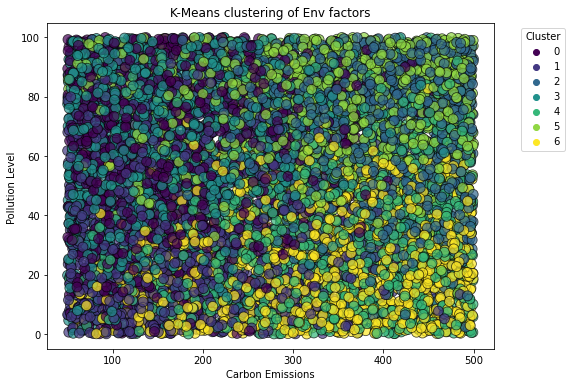

In [43]:
plt.figure(figsize=(8,6)) #canvas size
sns.scatterplot(x ='carbon_emissions', y='pollution_level', 
                hue ='cluster', data = df1, palette ='viridis', 
                s = 100, alpha = 0.7, edgecolor = 'k')
plt.title('K-Means clustering of Env factors')
plt.xlabel('Carbon Emissions')
plt.ylabel('Pollution Level ')
plt.legend(title ='Cluster', bbox_to_anchor = (1.05, 1), loc = 'upper left') #position of the legend 
plt.show()

In [ ]:
#x='carbon_emissions' → horizontal axis
#y='pollution_level' → vertical axis
#hue='cluster' → color points by cluster
#data=df1 → source DataFrame
#palette='viridis' → color palette
#s=100 → size of the points
#alpha=0.7 → transparency
#edgecolor='k' → black border around points

In [44]:
#extra

In [90]:
df1.isna().sum()

temperature         0
humidity            0
wind_speed          0
carbon_emissions    0
solar_irradiance    0
pollution_level     0
dtype: int64

In [91]:
df1.shape

(10000, 6)

In [92]:
df1.shape[0]

10000

In [93]:
df1.shape[1]

6

In [94]:
df1.columns

Index(['temperature', 'humidity', 'wind_speed', 'carbon_emissions',
       'solar_irradiance', 'pollution_level'],
      dtype='object')

In [95]:
X = df1[['temperature', 'humidity', 'wind_speed', 'carbon_emissions',
       'solar_irradiance']]
Y = df1['pollution_level']

In [45]:
#extra ends 

# Deep Learning

In [ ]:
#no manual feat selection unlike ml 
#i/p to neuron are numbers/feats/data points
#deep neural network - more than 1 layer 
#lost funct - aka cost funct
